#Organizing the modules
files, however, can go in folders and so can modules.
* A package is a collection of modules in a folder.
* The name of the package is the name of the folder.
* All we need to do to tell python that a folder is a packae is a place ( a normally empty file ) file in the folder named __init__.py.

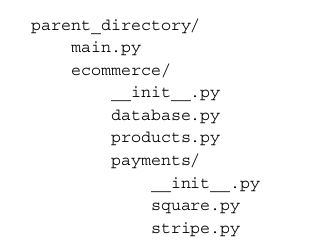

* ecommerce is a package. Package has multiple modules or files.
* Let's additionally have another package named "Payments". A package can have another package.

# Absolute Imports:
* Absolute imorts specify the complete path to the module, function, or path we want to import. 
* If we need access to Product class inside products module, we could use any of these syntaxes to do an absolute import.

import ecommerce.products
product = ecommerce.products.Product()

from ecommerce.products import Product
product = Product()

* the import statements use the period operator to seperate packages or modules.

* These statements will work from any module. 

For examples, the packages can also be installed to the python site packages folder, or the PYTHONPATH environment variable could be customized to dynamically tell Python what folders to search for packages and modules it is going to import.

* So, with these choices, which syntax do we choose?
- It depends on your personal taste and the application at hand.
- if there are dozens of classes and functions inside, the product module that i want to use, i generally import the module name using the

from ecommerce import products

product = products.Product()

* the import statements use the period operator to separate packages or modules.

* Packages can also be installed to the python site packages folder, or the PYTHONPATH environment variable could be customized to dynamically tell python what folders to search for packages and modules it is going to import.

Author recommends the following:
* from ecommerce import products syntax, and then access the individual classes using products.Product.
* If only need one or two classes fromthe products module, I can import them directly using the from ecommerce.products import Product.

# Relative Imports:

* When working with related modules in a package, it seems kind of silly to specify the full path, we know what our parent module is named.

* This is where relative imports come in. Relative imports are basically a way of saying find a class, funciton, or module as it is positioned relative to the current module.

* If we are working in the products module and we want to import the database class from the database modlue next to it, we could use relative import.

form .database import Database

* the period in front of database says "use the database module inside the current package". In this case, the current package is the package containing the products.py file we are currently editing, that is, the ecommerce package.

* if we are editing the paypal module inside the ecommerce.payments package, we would want to say " use the database package inside the parent package" instead. This is easily done with two periods, as shown here.

from ..database import Database

We can use more periods to go further up the hierarchy. Ofcourse, we can also go down one side and back up the other. 

Example:
ecommerce.contact package containing an email module snd wanted to import the send_mail function into our paypal module.

from ..contact.email import send_email

The import uses two periods to say, the parent of the payments package, and then uses the normal package.module syntax to go back up into the contact package.

* Finally, we can import code directly from packages, as opposed to just modules inside packages. In this example, we ehave an ecommerce package containing two modules named database.py and products.py. The database module contains a db variable that is accessed from a lot of places. 

- The database module contains a db variable that is accessed from a lot of places. Wouldn't it be convenient if this could be imported as:

import ecommerce.db instead of import ecommerce.database.db?

Remember the __init__.py file that defines a directory as a package? this file can contain any vairable or class declarations we like, and they will be available as part of the package.

Example: 
if the ecommerce/__init__.py file contained this line:

from .database import db

we can then access the db attribute from main.py or any other file using this import.

from ecommerce import db

it might help to think of the  __init__.py file as if it was an ecommerce.py file if that file were a module instead of a package. This can also be useful if you put all your code in a single module and later decide to break it up into a package of modules.
* The __init__.py file for the new package can still be the main point of contact for other modules talking to it, but the code can be inernally organized into several differnt modules or subpackages.

* Recommendation: Do not put all your code in an __init__.py file, though. Programmers do not expect actual logic to happen in this file, and much like with from x import *, it can trip them up if they are looking for the declaration of a particular piece of code and can't find it until they check __init__.py.

# Don't Do This: from database import * 
1. most experienced Python programmers will tell you that you should never use this syntax ( from database import *)
* a few will tell you there are some very specific situations wher it is useful, but we can disagree
* one way to learn why to avoid this syntax is touse it and try to understand your code two years later. We can save some time and two years of poorly written code with a quick explanation now!

# We've got several reasons for avoiding this: from database import *

* When we explicily import the database class at the top of our file using database import Database, we can easily see where the database class comes from.
* We might use db = Database() 400 lines later in the file, and we can quickly look at the imports to see where that Database class came from.

* Then, if we need clarification as to how to use the Database class, we can visit the original file( or import the module in the interactive interpreter and use the help database.Database command).
* However, if we use the from database import * syntax, it takes a lot longer to find where that class is located. Code maintenance becomes a nightmare.

* if ther are conflicting names, we're doomed. Let's say we have two modules both of thiwh provide a class named Database. Using from module_1 import * and from module_2 import * means the second import statement overwrites the database name created by the first import. if we use import module_1 and import module_2, ew'd use the module names as qualifiers to disambiguate module_1.Database from module_2.Database.

* In addition, mose code editors are able to provide extra functionality, such as reliable code completion, the ability to jump to the definition of a class, or inline documentation, if normal imports are used. The import * syntax can hamper their ability to do this reliably.

* Finally, using the import * syntax can bring unexpected objects into your local namespace. Sure,it will import allthe classes and functions defined in the module being imported from, but unless a special__all__ list is provided in the module, this import will also import any classes or modules that were themselves imported into that file.

# Important Note on  above topic
* Every name used in amodule should come from a well-specified place, whether it is defined in that module, or explicitly imported from another module. There should be no magic variables that seem to come out of thin air. We should always be able to immediately identify where the names in our current namespace originated. 

* It is inevitable that if you use this evil syntax, you will one day have extrememly frustrating moments of where on earth this class be coming from?

# Organizing our code in modules

* The python module is an important focus. Every application or web service has atleast one module. Even a seemingly "simple" python script is a module, we can specify variables, classes, or functions. They can be a handy way to store the global state without namespace conflicts. 

- Even a seemingly "simple" python script is a module, we can specify variables, classes, or functions. They can be a handy way to store the global state without namespace conflicts.

- For example, we have been importing the Dataase class into various modules and then instantiating it, but it might make more sense to have only one database object globally available from the database module. The database module might look like this.

- for example, we have been importing the database class into various modules and then instantiating it, but it might make more sense to have only one database object globally available from the database module. The database module might look like this.

class Database:
    """ The Database Implementation """

    def __init__(self, connection: optional[str] = None) -> None:
    












In [ ]:
from typing import Optional

class Database:
    """ The Database Implementation """

    def __init__(self, connection: Optional[str] = None) -> None:
        """ Create a connection to database """

        pass

database = Database("path/to/data")

"""
Then we can use any of the import methods we've discussed to access the database object, for example:

from ecommerce.database import database

A problem with preceeding class is that the database object is created immediately when the module is first imported,
wich is usually when the program starts up. This isn't always ideal, since connecting
to a database can take a while, slowing down startup, or the database connection information may not yet be available.

This isn't always ideal, since connecting to a database can take a while slowing down
startup, or the database connection information may not yet be available
because we need to read a configuation file.

- We could delay creating data basee until it is actually needed by calling an initialize_database() function
to create a module-level variable.

- we could delay creating data base until it is actually needed by calling an 
initialize_database() function to create a module level variable.


"""

db : Optional[Database] = None

def initialize_database(connection: Optional[str] = None) -> None:
    global db
    db = Database(connection)


"""
The Optional[Database] type hint signals to the mypy tool that this may be non or it may
have an instance of the database class.

The optional hint is defined in the typing module. 
* this hint can be handy elsewhere in our application to make sure we confirm that the value
for the data base variable is not none.


"""



# Important Note on global key word used above

The global keyword tells Python that the database variable inside initialize_database() is the module-level variable, outside the function. If we had not specified the variable as global, Python would have created a new local variable that would be discarded when the funciton exits.

- If we had not specified the variable as global, Python would have created a new local variable that would be discarded when the function exits leaving the module level value unchanged.

- We need to make one additional change. We need to import the database module as a whole. We can't import the db object from inside the module;

- We need to import the database module as a whole. We can't import the db object from inside the module; It might not have been initialized.

- We need to be sure database.initalize_dataase() is called before db will have a meaning ful vlaue.

- if we wanted a direct access to the database object, we'd use database.db.

- A common alternative is a funciton that returns the current database object. We could import this function everywhere we needed access to the database.


In [ ]:
def get_database(connection: Optional[str] = None) -> Database:
    global db
    if not db:
        db = Database(connection)
    return db



A common alternative is a function that returns the current database object that could import this function everywhere we needed access to the database.

def get_database(connection: Optional[str] = None) -> Database:
    
    global db
    if not db:
        db = Database(connection)
        return db


As these examples illustrate, all module-level code is executed immediately at the time it is imported. The class and def statements create code objects to be executed later when the function is called.

- As these examples illustrate, all module-level code is executed immediately at the time it is imported. The class and def statements create code objects to be executed later when the function is called. This can be tricky thing for scripts that perform execution, such as the main script in our ecommerce example. Sometimes, we write a program that does something useful, and then later find that we want to import a function or class from that module into a different program. However, as soon as we import it, any code at the module level is imeediately executed.

- However, as soon as we import it, any code at the module level is immediately executed. If we are not careful, we can end up runniing the first program when we really only meant to access a couple of functions inside that module.

- To solve this, we should always put our startup code ina function (conventionally called main()) and only execute the function when we know we are running the module as a script, but not when our code is being imported from a different script.
- We can do this by guarding the call to main inside a conditional statement, demonstrated as follows:

In [ ]:
class Point:
    """
    Represent a point in a two dimensional geometric coordinates
    """
    pass


def main() -> None:
    """
    Does the useful work.

    >>> main()
    p1.calcluate_distance(p2) = 5.0 
    """
    p1 = Point()
    p2 = Point(3,5)
    print(f"{p1.calculate_distance(p2)=}")

if __name__ == "__main__":
    main()



The point class ( and the main() function) can be reused without worry. We can import the contents of this module without any surprising processing happening.

When we run it as a main program, however, it executes the main() function. This works because every module has __name__ special variable( remember, python uses doule underscores for special variabls, such as a class __init__ method) that specifies the name of the module when it was imported.

- This works because every module has __name__ special variable (remember, python uses double underscores for special variables, such as a class __init__method) that specifies the name of the module when it was imported.

- When the module is executed directly with python module.py, it is never imported, so the __name__ is arbitrarily set to the "__main__" string.

# Policy Note:
Make it a policy to wrap all your scripts in a if__name__ == "__main__": test, just in case you write a function that you may want to be imported by other code at some point in future.

So method go in classes, which go in modules, which go in package. Is that all ther is to it?

Actually no, this is the typical order of things ina python program, but it's not the only possile layout. Classes can be defined anywhere . They are typically defined at the module level, but they can also be defined inside a function or method, like this.


#Quick Note:
We've seen how to create classes and how to create modules. With these core techniques, we can start thinking about writing useful, helpful software to solve problems.
- When the application or service gets big, though, we often have boundary issues. We need to be sure that objects respect each other's privacy and avoid confusing entaglements that make complex software into a spaghetti bowl of interrlationships. 
- We'd prefer each class to be a nicely encapsulated ravioli. lets look at another aspect of organizing our software to create a good design.



# Who can access my data?
- Most object oriented programming languages have a concept of access control.
- This is related to abstraction. Some attributes and methods on an object are marked private, meaning only that object can access them.
- Others are marked protected, meaning only that class and any subclass have access. The rest are public, meaning any other object is allowed to acces them.

# Python Doesn do this. 
- Python doesn't really believe in enforcing laws that might some day get in your way.
- Instead it provided unenforced guidelines and best practices.
- Technically, all methods and attriutes on a class are publicly avaialable.
- If we want to suggest that a method should not be used publicly, we can put a note to docstrings indicating that the method is meant for internal use only( Preferably, with an explanation of how the public facing API works).

# We 're all adults here. Ther is no need to declare a variable as private when we can all see source code.

* By convention, we generally prefix an internal attribute or method with an underscore character _. 
* Python programmers will understand a leading underscore name to mean this is an internal variable, think three times before accessing it directly. 
* but there is nothing inside the interpreter to stop them from accessing itif they think it is in their best interest to do so. Because, if they think so, why should we stop them, we may not have any idea what future uses our classes might be put to, and it may be removed in a future release. It's a pretty clear warning sign to avoid using it.

# There's another thing you can do to strongly suggest that outside objects don't access a property or method: Prefix it with double underscore.
* this will perform nanem mangling on the attribute in question. In essence, name mangling means that hte method can still be called outside objects if they really want to do so, but it requires extra work and is a strong indidcator that you  demant that your attributes remain private.

* When we use double underscore, the property is prefixed with _<classname>.
* When methods in the class internally access the variable, they are automatically unmangled. When external classes wish to access it, they have to do the name mangling themselves.
* so, name mangling does not guarantee privacy; 
* It only strongly recommends it.
** This is very rarely used, and often a source of confusion when it is used.

# Don't create new double underscore names in your own code, it will only cause grief and heartache. Consider this reserved for Python's internally defined special names.



What's important is that encapsulation - as a design principle -  ensures that the methods of a class encapsulate the state changes for the attributes.

* What's important is that encapsulation as a design principle - ensures that the methods of a class encapsulate the state changes for the attributes. Whether or not attributes (or methods) are private doesn't change the essential good design that flows from encapsulation.

* The encapsulation principle applies to individual classes as well as a module with a bunch of classes.
* As designers of object oriented Python, we are isoloating responsiilities and clearly encapsulating features.
* As designers of object oriented Python, we're isolating responsibilities and clearly encapsulating features.

* the best programmers are extrememly lazy and prefer to reuse existing, proven code, rather than write their own. 


* The common consensus in the Python community is that you don't touch any python that's part of the OS. Older mac os x releases had a python 2.7 installed. This was not really available for end users. It's best to think of it as part of the OS, and ignore it always install a fresh new python.

* Python ships with a tool called venv, a utility that gives you a python installation called a virtual environment in your working directory.
* when you activate this environment, commands related to python will work with your virutual environments python instead of the system python.
* So, when you run pip or python it wont't touch the system Python at all,

Cd project_directory
python -m venv env
source env/bin/activiate # on linux or macos
env/scripts/activate.bat # on windows.

* once the virtual environment is activated, you are assured that python -m pip will install new packages into the virtual environment, leaving any os python alone. you can now use python -m pip install mypy command to add the mypy tool to your current virtual environment.

8 On a home computer - where yoiu have access to the priviliged files - you can sometimes get away with installing and working with single, centralized system wide python. In an enterprie computing environment, where system wide directories required special privileges, a virtual envirnonemtn is required. 

* Virtual environments are essential for keeping your third party dependencies separate from python's standard library. It is common to have different projects that depend on differnt versions of a particular library for example, an older website might run on Django 1.8, while newer versions runon Django 2.1. Keeping each project in separate virtual environments makes it easy to work in either versions of Django. Furthermore, it prevents the conflicts between system installed packages and pip installed packages if you try to install the same package using different tools. 

* Finally, it bypasses any PS permissions restrictions surrounding the OS python.

* Ther are several thirdparty tools for managing virtual environments effectively, some of these include virtual env, pyenv, virtualenvwrapper, and conda. If you're working in a data science environment, you'll probaly need to use conda so you can install more complex packages. There are a number of features leading to a lot of differnt approaches to solving a problem of managing the huge python ecosystem of third party packages.